In [1]:
%pip install --upgrade pip
%pip install python2verilog==0.1.9

Agent pid 210020
Identity added: /home/kerrwang/.ssh/id_ed25519 (Kerry.Wang@amd.com)
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Agent pid 210035
Identity added: /home/kerrwang/.ssh/id_ed25519 (Kerry.Wang@amd.com)
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import matplotlib.pyplot as plt
import random
import numpy as np
from typing import Optional
from python2verilog import verilogify, context_to_text_and_file

In [3]:
def make_visual(generator_inst, directory: Optional[str] = None):
    """
    Any iterable of tuples where the tuples are of length > 0 will work.
    Visualizes the first 3 elements of each tuple as (x, y, colour)
    """

    # Generate the data using the generator function
    data_triple_list = []

    for idx, yields in enumerate(generator_inst):
        if isinstance(yields, int):
            yields = (yields,)
        if len(yields) >= 3:
            data_triple_list.append(yields[:3])
        elif len(yields) >= 2:
            data_triple_list.append((*yields[:2], 1))
        else:
            data_triple_list.append((yields[0], idx, 1))

    data_triple = np.array(data_triple_list)

    try:
        height = max(data_triple[:, 0])
        width = max(data_triple[:, 1])
        grid = np.zeros((int(height) + 1, int(width) + 1))
        for x_coord, y_coord, colour in data_triple:
            grid[x_coord, y_coord] = colour

        # Create the pixel-like plot
        plt.imshow(grid)

        # Set labels and title
        plt.xlabel("X")
        plt.ylabel("Y")
        plt.title("Pixel-like Plot")

        # Add color bar
        cbar = plt.colorbar()
        cbar.set_label("Z")

        plt.gca().invert_yaxis()

        # Show the plot
        plt.show()
        if directory: 
            plt.savefig(directory)

        plt.clf()
        plt.cla()
        plt.close()
        
    except IndexError as e:
        print(
            f"Skipping make_visual for {str(generator_inst)} due to negative outputs {e}",
        )

x: 95, y: 37, radius: 30
[(140, 46), (110, 76), (80, 46), (110, 76), (80, 46), (110, 16), (140, 46), (110, 16), (140, 47), (111, 76), (80, 47), (109, 76), (80, 45), (109, 16), (140, 45), (111, 16), (140, 48), (112, 76), (80, 48), (108, 76), (80, 44), (108, 16), (140, 44), (112, 16), (140, 49), (113, 76), (80, 49), (107, 76), (80, 43), (107, 16), (140, 43), (113, 16), (140, 50), (114, 76), (80, 50), (106, 76), (80, 42), (106, 16), (140, 42), (114, 16), (140, 51), (115, 76), (80, 51), (105, 76), (80, 41), (105, 16), (140, 41), (115, 16), (139, 52), (116, 75), (81, 52), (104, 75), (81, 40), (104, 17), (139, 40), (116, 17), (139, 53), (117, 75), (81, 53), (103, 75), (81, 39), (103, 17), (139, 39), (117, 17), (139, 54), (118, 75), (81, 54), (102, 75), (81, 38), (102, 17), (139, 38), (118, 17), (139, 55), (119, 75), (81, 55), (101, 75), (81, 37), (101, 17), (139, 37), (119, 17), (138, 56), (120, 74), (82, 56), (100, 74), (82, 36), (100, 18), (138, 36), (120, 18), (138, 57), (121, 74), (82, 5

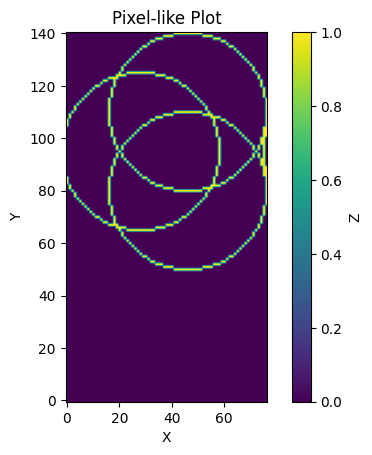

x: 32, y: 93, radius: 30
[(77, 102), (47, 132), (17, 102), (47, 132), (17, 102), (47, 72), (77, 102), (47, 72), (77, 103), (48, 132), (17, 103), (46, 132), (17, 101), (46, 72), (77, 101), (48, 72), (77, 104), (49, 132), (17, 104), (45, 132), (17, 100), (45, 72), (77, 100), (49, 72), (77, 105), (50, 132), (17, 105), (44, 132), (17, 99), (44, 72), (77, 99), (50, 72), (77, 106), (51, 132), (17, 106), (43, 132), (17, 98), (43, 72), (77, 98), (51, 72), (77, 107), (52, 132), (17, 107), (42, 132), (17, 97), (42, 72), (77, 97), (52, 72), (76, 108), (53, 131), (18, 108), (41, 131), (18, 96), (41, 73), (76, 96), (53, 73), (76, 109), (54, 131), (18, 109), (40, 131), (18, 95), (40, 73), (76, 95), (54, 73), (76, 110), (55, 131), (18, 110), (39, 131), (18, 94), (39, 73), (76, 94), (55, 73), (76, 111), (56, 131), (18, 111), (38, 131), (18, 93), (38, 73), (76, 93), (56, 73), (75, 112), (57, 130), (19, 112), (37, 130), (19, 92), (37, 74), (75, 92), (57, 74), (75, 113), (58, 130), (19, 113), (36, 130), 

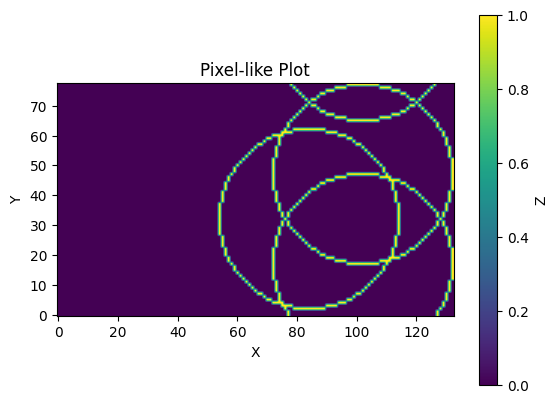

x: 38, y: 66, radius: 30
[(83, 75), (53, 105), (23, 75), (53, 105), (23, 75), (53, 45), (83, 75), (53, 45), (83, 76), (54, 105), (23, 76), (52, 105), (23, 74), (52, 45), (83, 74), (54, 45), (83, 77), (55, 105), (23, 77), (51, 105), (23, 73), (51, 45), (83, 73), (55, 45), (83, 78), (56, 105), (23, 78), (50, 105), (23, 72), (50, 45), (83, 72), (56, 45), (83, 79), (57, 105), (23, 79), (49, 105), (23, 71), (49, 45), (83, 71), (57, 45), (83, 80), (58, 105), (23, 80), (48, 105), (23, 70), (48, 45), (83, 70), (58, 45), (82, 81), (59, 104), (24, 81), (47, 104), (24, 69), (47, 46), (82, 69), (59, 46), (82, 82), (60, 104), (24, 82), (46, 104), (24, 68), (46, 46), (82, 68), (60, 46), (82, 83), (61, 104), (24, 83), (45, 104), (24, 67), (45, 46), (82, 67), (61, 46), (82, 84), (62, 104), (24, 84), (44, 104), (24, 66), (44, 46), (82, 66), (62, 46), (81, 85), (63, 103), (25, 85), (43, 103), (25, 65), (43, 47), (81, 65), (63, 47), (81, 86), (64, 103), (25, 86), (42, 103), (25, 64), (42, 47), (81, 64), 

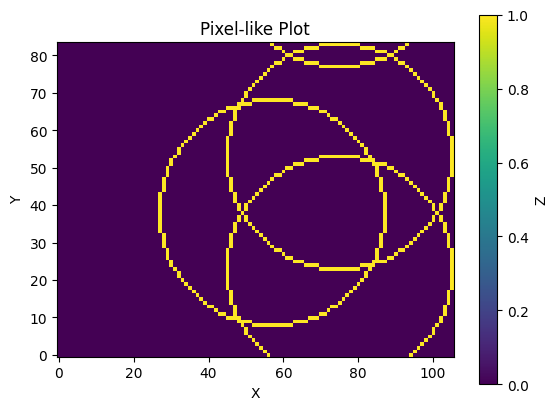

In [10]:
import math


namespace = {}


def draw_circle(centre_x, centre_y, radius):
    offset_y = 0
    offset_x = radius
    crit = 1 - radius
    while offset_y <= offset_x:
        yield (centre_x + offset_x, centre_y + offset_y)  # -- octant 1
        yield (centre_x + offset_y, centre_y + offset_x)  # -- octant 2
        yield (centre_x - offset_x, centre_y + offset_y)  # -- octant 4
        yield (centre_x - offset_y, centre_y + offset_x)  # -- octant 3
        yield (centre_x - offset_x, centre_y - offset_y)  # -- octant 5
        yield (centre_x - offset_y, centre_y - offset_x)  # -- octant 6
        yield (centre_x + offset_x, centre_y - offset_y)  # -- octant 8
        yield (centre_x + offset_y, centre_y - offset_x)  # -- octant 7
        offset_y = offset_y + 1
        if crit <= 0:
            crit = crit + 2 * offset_y + 1
        else:
            offset_x = offset_x - 1
            crit = crit + 2 * (offset_y - offset_x) + 1


def draw_reuleaux_triangle(centre_x, centre_y, radius):
    c_x = centre_x
    c_y = centre_y
    c_x1 = c_x + radius // 2
    c_y1 = c_y + round(radius * math.sqrt(3) / 6)
    c_x2 = c_x - radius // 2
    c_y2 = c_y + round(radius * math.sqrt(3) / 6)
    c_x3 = c_x
    c_y3 = c_y - round(radius * math.sqrt(3) / 6)

    yield from draw_circle(c_x1, c_y1, radius)
    yield from draw_circle(c_x2, c_y2, radius)
    yield from draw_circle(c_x3, c_y3, radius)

for _ in range(3):
    x, y, radius = (
        random.randint(30, 100),
        random.randint(30, 100),
        random.randint(30, 30),
    )
    print(f"x: {x}, y: {y}, radius: {radius}")
    print(list(draw_reuleaux_triangle(x, y, radius)))
    make_visual(draw_reuleaux_triangle(x, y, radius))
